In [1]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()

In [2]:
'''
The data I will use is on the classification of poker hands from here
http://archive.ics.uci.edu/ml/datasets/Poker+Hand
'''
import urllib.request
import matplotlib.pyplot as plt
import numpy as np

req = urllib.request.Request('http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data')
response = urllib.request.urlopen(req)
the_page = response.read().decode()

Pok = the_page


In [3]:
'''
Here we convert the data set from a string into an array
'''
NewPok = Pok.split('\n')
for s in NewPok:
    s.strip('\r') # remove the \r from the string borders
for s in NewPok:
    s.replace('\r', '') # remove all the \rs

for i in range(len(NewPok)):
    NewPok[i] = np.fromstring(NewPok[i], dtype = int,sep = ',')

In [4]:
NewPok
len(NewPok)

25011

In [6]:
X = []
Y = []
for i in range(len(NewPok)-1):
    X.append(NewPok[i][:10])
    element = NewPok[i][10]
    Y.append(element)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [9]:
#estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
from sklearn.model_selection import GridSearchCV
parameters= {'leaf_size':[30,100],'n_neighbors':[3,4,7,9,11],'p':[1.0,2.0]}
best_estimator = GridSearchCV(estimator,param_grid = parameters, cv = 5)
best_estimator.fit(X_train, y_train)
print(best_estimator.cv_results_)

C:\Users\KCast_000\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'mean_fit_time': array([0.07807155, 0.10872355, 0.09454174, 0.11293015, 0.06635942,
       0.1181272 , 0.08534517, 0.14751348, 0.11162882, 0.12566724,
       0.08903432, 0.09705119, 0.09401946, 0.11992621, 0.08146691,
       0.11932578, 0.06715803, 0.12452364, 0.10553565, 0.12092457]), 'std_fit_time': array([0.01687103, 0.02290448, 0.03110513, 0.02435621, 0.02000406,
       0.02939952, 0.02649074, 0.01502745, 0.02076712, 0.00897552,
       0.03104533, 0.02681917, 0.0183614 , 0.0212174 , 0.04605246,
       0.02531849, 0.02015101, 0.03587638, 0.02546948, 0.03418327]), 'mean_score_time': array([1.01296482, 0.44312716, 1.43511763, 0.51914811, 1.17967386,
       0.69083014, 1.4812655 , 0.93790402, 2.20193367, 1.01286244,
       1.12519407, 0.5810225 , 1.40840192, 0.61302214, 1.98854356,
       0.54446502, 1.42342396, 0.91383729, 3.15581741, 1.08384724]), 'std_score_time': array([0.10435966, 0.02841954, 0.29146192, 0.13850663, 0.20369931,
       0.201258  , 0.19414193, 0.1052858 , 0.4196365

In [26]:
print(best_estimator.best_score_)

0.5677880258036999


Doesn't look like we can make it anymore accurate

In [25]:
y_predicted = estimator.predict(X_test)

#test the accuracy
accuracy = np.mean(y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 54.2%


The accuracy is not very good. I think there are too many variables to deal with.

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
average_accuracy = np.mean(scores)*100
print("The accuracy is {0:.1f}%".format(average_accuracy))

C:\Users\KCast_000\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


The accuracy is 54.4%


The accuracy is still not very good.

In [27]:
import warnings
warnings.filterwarnings('ignore')

avg_scores = []
all_scores = []
parameters = list(range(1,20))
for n_neighbors in parameters:
    estimator = KNeighborsClassifier()
    scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

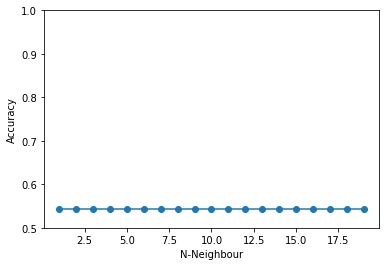

In [28]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(parameters, avg_scores, '-o')
plt.xlabel('N-Neighbour')
plt.ylabel('Accuracy')
plt.ylim([0.5,1.0])

plt.show()